In [1]:
#importing the libraries
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels
import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
import plotly.graph_objects as go
from fancyimpute import KNN, IterativeImputer


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
 sns.set_style('whitegrid')

In [4]:
# Load the dataset
df=pd.read_csv('/Users/pamel/Downloads/Happiness.csv')
df.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [5]:
#Checking columns

df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
#Dropping unnecessary columns

df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Ladder score in Dystopia','Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis = 1, inplace=True)

In [7]:
#Checking data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [8]:
df.head()

Country name Regional indicator  Ladder score  Logged GDP per capita  \
0      Finland     Western Europe         7.842                 10.775   
1      Denmark     Western Europe         7.620                 10.933   
2  Switzerland     Western Europe         7.571                 11.117   
3      Iceland     Western Europe         7.554                 10.878   
4  Netherlands     Western Europe         7.464                 10.932   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.954                     72.0                         0.949   
1           0.954                     72.7                         0.946   
2           0.942                     74.4                         0.919   
3           0.983                     73.0                         0.955   
4           0.942                     72.4                         0.913   

   Generosity  Perceptions of corruption  
0      -0.098                      0.186  
1       0.030                      0.179  
2       0.025                      0.292  
3       0.160                      0.673  
4       0.175                      0.338

In [9]:
df.shape

(149, 9)

In [10]:
#Statistics summary

df.describe()

Ladder score  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.532839               9.432208        0.814745   
std        1.073924               1.158601        0.114889   
min        2.523000               6.635000        0.463000   
25%        4.852000               8.541000        0.750000   
50%        5.534000               9.569000        0.832000   
75%        6.255000              10.421000        0.905000   
max        7.842000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000   -0.126000   
50%                  66.603000                      0.804000   -0.036000   
75%                  69.600000                      0.877000    0.079000   
max                  76.953000                      0.970000    0.542000   

       Perceptions of corruption  
count                 149.000000  
mean                    0.727450  
std                     0.179226  
min                     0.082000  
25%                     0.667000  
50%                     0.781000  
75%                     0.845000  
max                     0.939000

In [11]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

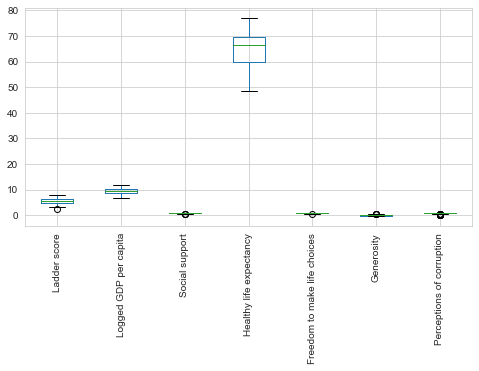

In [12]:
#Checking for outliers/data distribution

plt.figure(figsize=(8,4))
df.boxplot()
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'GDP per Capita')

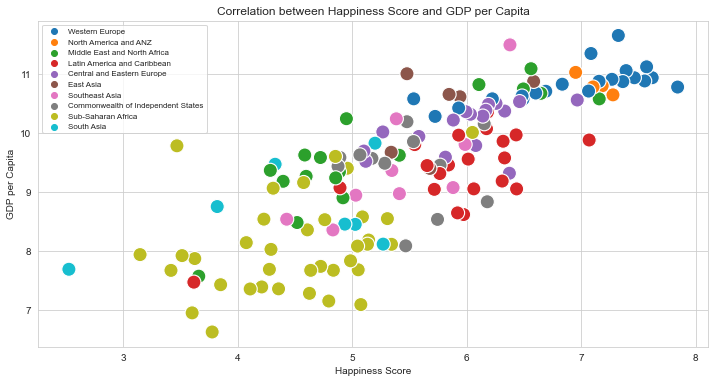

In [13]:
#EDA - Happiness Score vs GDP per Capita

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Correlation between Happiness Score and GDP per Capita')
sns.scatterplot(x = df['Ladder score'], y = df['Logged GDP per capita'], hue = df['Regional indicator'], s = 200);

plt.legend(loc = 'upper left', fontsize = '8')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

In [14]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

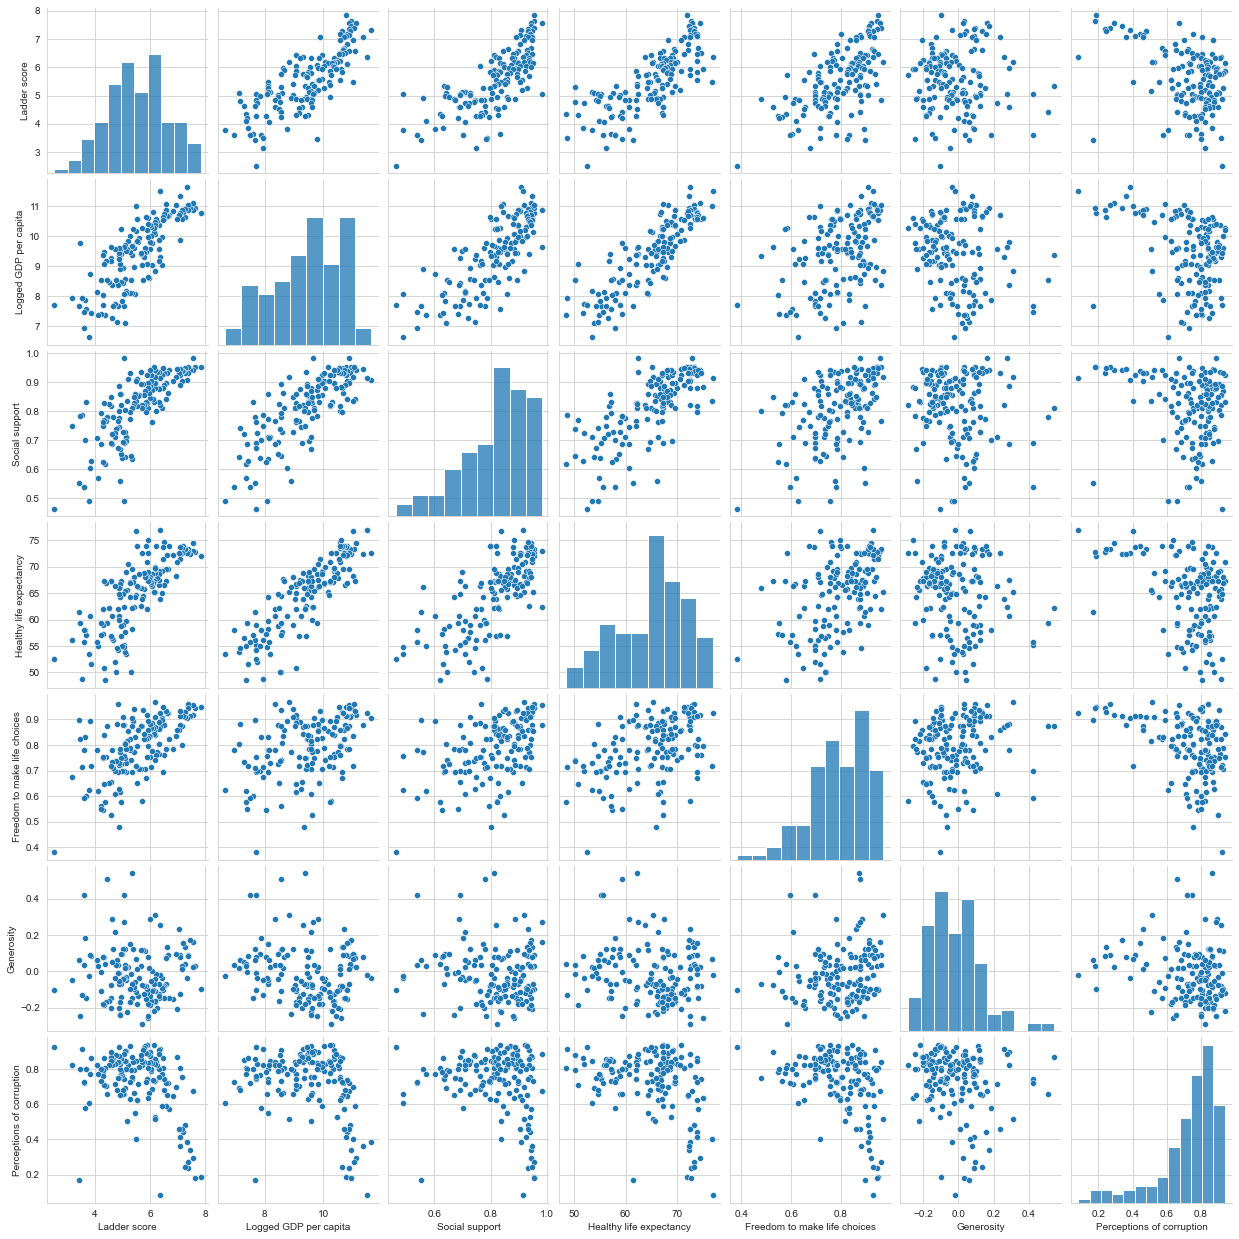

In [15]:
#Checking the distribution/correlation

fig = plt.figure(figsize=(10, 8))
sns.pairplot(df[['Ladder score','Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])

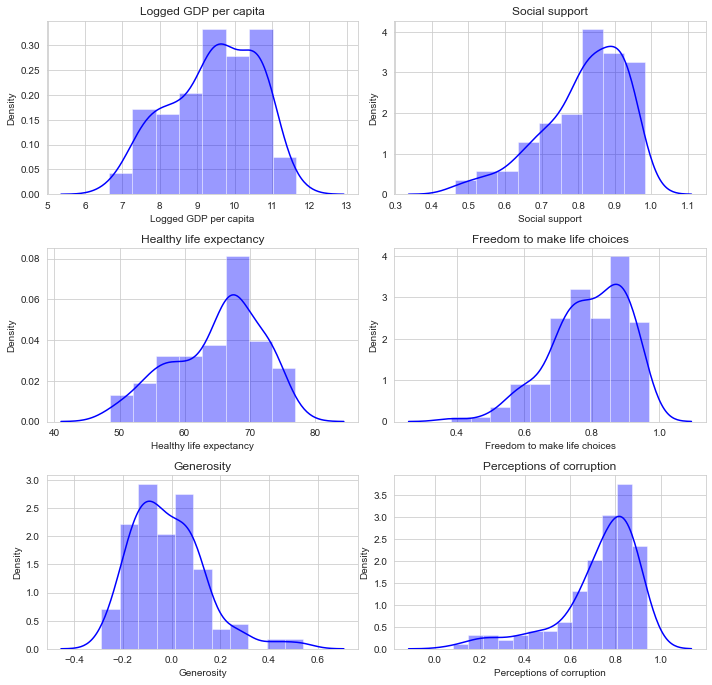

In [16]:
columns = ['Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (10, 25))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(df[columns[i]], color = 'b');
  plt.title(columns[i])

plt.tight_layout()

In [17]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [18]:
# Separating out the features
x_features = df.loc[:,['Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

Country = df.loc[:,['Country name']]

In [19]:
#outliers treatment 

def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL

In [20]:
for column in x_features:
    if x_features[column].dtype != 'object':
        UL, LL = outlier_limits(x_features[column])
        x_features[column] = np.where((x_features[column] > UL) | (x_features[column] < LL), np.nan, x_features[column])

In [21]:
x_features.isnull().sum()

Logged GDP per capita            0
Social support                   3
Healthy life expectancy          0
Freedom to make life choices     1
Generosity                       4
Perceptions of corruption       11
dtype: int64

In [22]:
df_mean = x_features.copy()

In [23]:
df_int = x_features.copy()



In [24]:
df_mean.isnull().sum()

Logged GDP per capita            0
Social support                   3
Healthy life expectancy          0
Freedom to make life choices     1
Generosity                       4
Perceptions of corruption       11
dtype: int64

In [25]:
#Replacing outliers w/ mean 

df_mean[['Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']] = df_mean[['Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']].fillna(value=df_mean[['Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']].mean())



In [26]:
df_mean.isnull().sum()

Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [27]:
df_int.isnull().sum()

Logged GDP per capita            0
Social support                   3
Healthy life expectancy          0
Freedom to make life choices     1
Generosity                       4
Perceptions of corruption       11
dtype: int64

In [28]:
#Replacing outliers w/ interpolation 

df_int[['Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']] = df_int[['Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']].interpolate(method ='linear').ffill().bfill()


In [29]:
df_int.isnull().sum()

Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [30]:
data =pd.read_csv('/Users/pamel/Downloads/Happiness.csv')

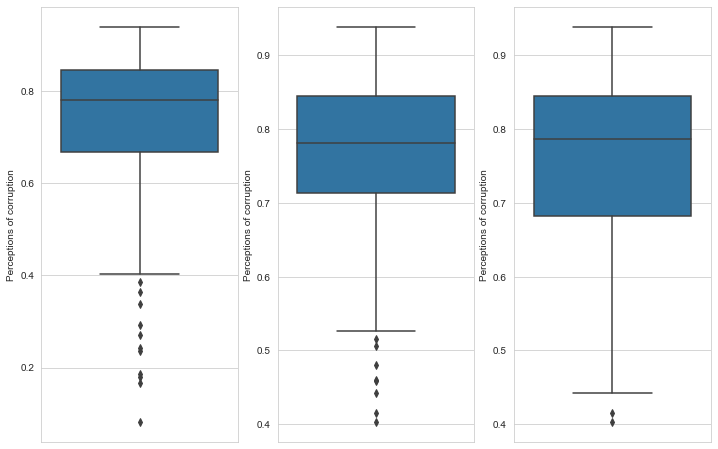

In [31]:
# Comparing best outlier treatment (Mean or interpolation method)

plt.figure(figsize = (12, 8))
plt.subplot(1,3,1)
sns.boxplot(y = data.iloc[:,11])

plt.subplot(1,3,2)
sns.boxplot(y = df_mean.iloc[:,5])

plt.subplot(1,3,3)
sns.boxplot(y = df_int.iloc[:,5])
plt.show()

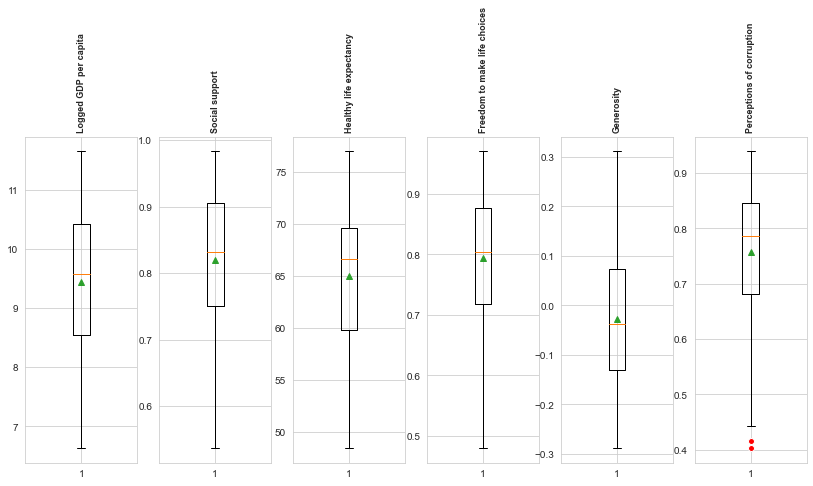

In [32]:
#Data after outliers treatment (Interpolation method)

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_int.iloc[:6:]), figsize=(14,6))


for i, ax in enumerate(axs.flat):
    ax.boxplot(df_int.iloc[:,i], flierprops=red_circle, showmeans=True)
    ax.set_title(df_int.columns[i], fontsize=9, fontweight='bold', rotation=90)
    ax.tick_params(axis='y', labelsize=10)

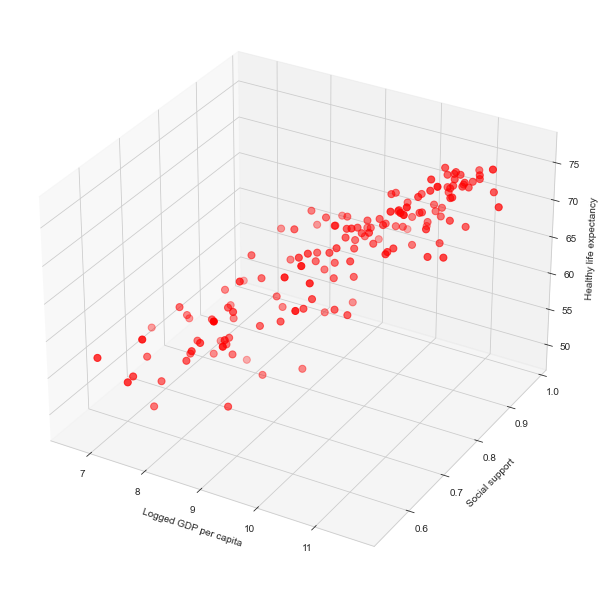

In [33]:
#3D visualisation 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# defining a figure and a 3D axis
fig = plt.figure(figsize=(8,10))
ax = Axes3D(fig)

# defining the x, y, & z of scatter plot
x = list(df_int.iloc[:,0])
y = list(df_int.iloc[:,1])
z = list(df_int.iloc[:,2])

# defining the axis labels
column_names = df_int.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# defining the markers, and the color
ax.scatter(x, y, z, c='red', marker='o', s = 50)

plt.show()

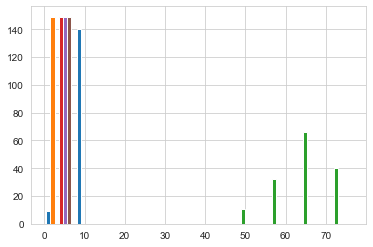

In [34]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(df_int)
pyplot.show()

In [35]:
#MinMaxScaling

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_MM = min_max_scaler.fit_transform(df_int)

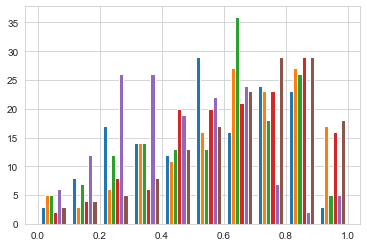

In [36]:
pyplot.hist(df_MM)
pyplot.show()

In [37]:
df_MM = pd.DataFrame(df_MM, columns = df_int.columns)
df_MM


Logged GDP per capita  Social support  Healthy life expectancy  \
0                 0.826018        0.934978                 0.826058   
1                 0.857542        0.934978                 0.850641   
2                 0.894254        0.908072                 0.910342   
3                 0.846568        1.000000                 0.861176   
4                 0.857342        0.908072                 0.840105   
..                     ...             ...                      ...   
144               0.257582        0.560538                 0.007796   
145               0.627893        0.553812                 0.378964   
146               0.207702        0.033632                 0.453802   
147               0.260974        0.477578                 0.271220   
148               0.211492        0.477578                 0.141001   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                        0.957143    0.317195                   0.503731  
1                        0.951020    0.530885                   0.503731  
2                        0.895918    0.522538                   0.503731  
3                        0.969388    0.747913                   0.503731  
4                        0.883673    0.772955                   0.444030  
..                            ...         ...                        ...  
144                      0.479592    0.262104                   0.955224  
145                      0.702041    0.070117                   0.742537  
146                      0.851020    0.582638                   0.761194  
147                      0.402041    0.402337                   0.779851  
148                      0.402041    0.310518                   0.972015  

[149 rows x 6 columns]

In [38]:
#Applying PCA 

rand_state = 1000
from pca import pca 

In [39]:
pca()
model = pca(n_components=3, normalize=False)
pca_results = model.fit_transform(df_MM)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [40]:
pca_results

{'loadings':      Logged GDP per capita  Social support  Healthy life expectancy  \
 PC1              -0.530443       -0.506895                -0.538076   
 PC2              -0.174324       -0.160103                -0.111944   
 PC3              -0.031800        0.206282                -0.041489   
 
      Freedom to make life choices  Generosity  Perceptions of corruption  
 PC1                     -0.343899    0.033481                   0.229726  
 PC2                      0.372380    0.691195                  -0.561274  
 PC3                      0.373181    0.462028                   0.775875  ,
 'PC':           PC1       PC2       PC3
 0   -0.576043  0.001498 -0.013779
 1   -0.596733  0.138672  0.080644
 2   -0.616022  0.103608  0.047030
 3   -0.628591  0.285844  0.201096
 4   -0.559769  0.319942  0.115927
 ..        ...       ...       ...
 144  0.621672 -0.217182  0.107641
 145  0.097149 -0.252698 -0.091630
 146  0.513656  0.294714  0.118194
 147  0.511260 -0.067497 -0.020726
 1

In [41]:
#Checking best features

Top_pca = pca_results['topfeat']
Top_pca

PC                       feature   loading  type
0  PC1       Healthy life expectancy -0.538076  best
1  PC2                    Generosity  0.691195  best
2  PC3     Perceptions of corruption  0.775875  best
3  PC1         Logged GDP per capita -0.530443  weak
4  PC1                Social support -0.506895  weak
5  PC3  Freedom to make life choices  0.373181  weak

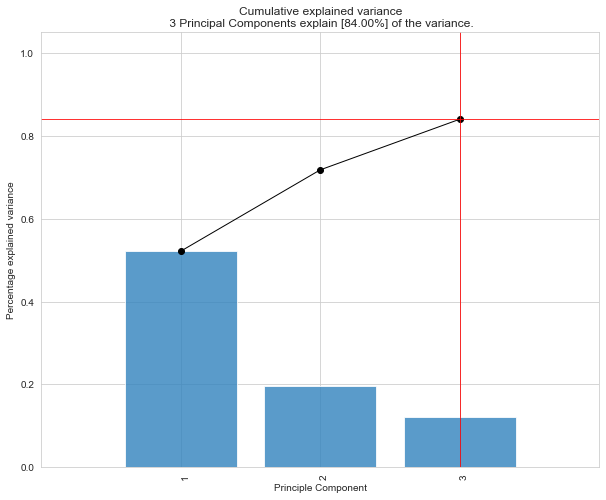

<Figure size 432x288 with 0 Axes>

In [42]:
#Principle components Graph

model.plot(figsize=(10,8))
plt.show()

In [43]:
#Explained variance

pca_results['explained_var']

array([0.52143042, 0.71782246, 0.84008066])

In [44]:
#saving results in a dataframe
pca_df = pd.DataFrame(pca_results['PC'])

In [45]:
pca_df

PC1       PC2       PC3
0   -0.576043  0.001498 -0.013779
1   -0.596733  0.138672  0.080644
2   -0.616022  0.103608  0.047030
3   -0.628591  0.285844  0.201096
4   -0.559769  0.319942  0.115927
..        ...       ...       ...
144  0.621672 -0.217182  0.107641
145  0.097149 -0.252698 -0.091630
146  0.513656  0.294714  0.118194
147  0.511260 -0.067497 -0.020726
148  0.648646 -0.215616  0.092922

[149 rows x 3 columns]

In [46]:
pca_labels = pca_results['loadings']
pca_labels

Logged GDP per capita  Social support  Healthy life expectancy  \
PC1              -0.530443       -0.506895                -0.538076   
PC2              -0.174324       -0.160103                -0.111944   
PC3              -0.031800        0.206282                -0.041489   

     Freedom to make life choices  Generosity  Perceptions of corruption  
PC1                     -0.343899    0.033481                   0.229726  
PC2                      0.372380    0.691195                  -0.561274  
PC3                      0.373181    0.462028                   0.775875

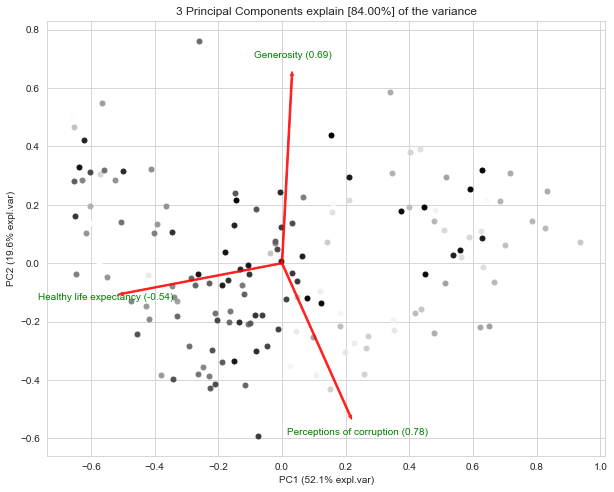

In [47]:
#PCA features visualisation

model.biplot(n_feat=3,  legend=False, figsize=(10,8), label=False, cmap='binary')
plt.show()

In [48]:
from sklearn import metrics

#Kmeans clustering (checking for number of k')

# definying a dictionary
results_dict = {}

# definying how many clusters.
num_of_clusters = 10

# runing through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # definying a dictionary to hold the results.
    results_dict[k] = {}

    # fiting the training data
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_df)
    
    # definying the silhouette score
    sil_score = metrics.silhouette_score(pca_df, kmeans.labels_, metric='euclidean')
    
    # storying the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # printing the results    
    print("Number of Clusters: {}".format(k))
    print('silhouette_score', sil_score)
    print('inertia', kmeans.inertia_)
    

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
silhouette_score 0.39166264988335747
inertia 21.530629512364875
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
silhouette_score 0.37603260921083437
inertia 14.739353799954817
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
silhouette_score 0.350254982549967
inertia 11.986304310498515
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
silhouette_score 0.3516718801376708
inertia 9.818862222300993
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
silhouette_score 0.3367962572788354
inertia 8.66289514271759
------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


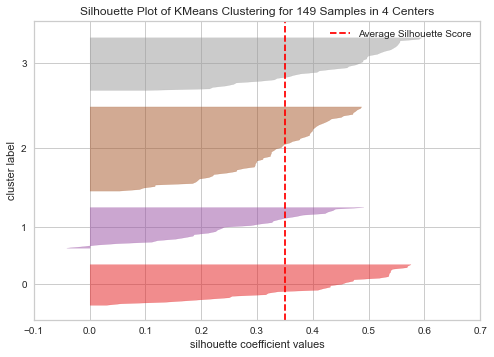

----------------------------------------------------------------------------------------------------


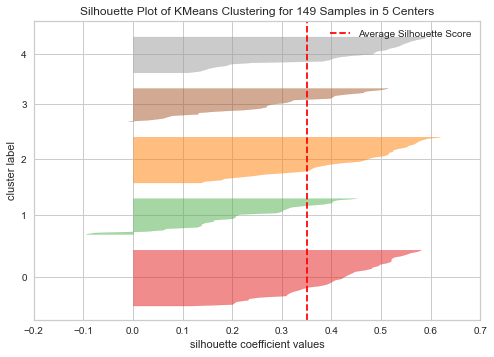

In [49]:

from yellowbrick.cluster import SilhouetteVisualizer

clusters = [4,5]

for cluster in clusters:
    
    print('-'*100)

    # defining the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # passing the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fiting the data
    visualizer.fit(pca_df)

   
    visualizer.poof()

In [50]:
from yellowbrick.cluster import KElbowVisualizer

----------------------------------------------------------------------------------------------------


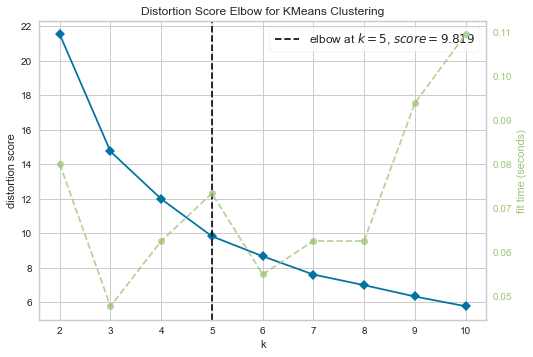

In [51]:
clusters = [10]

for cluster in clusters:
    
    print('-'*100)

    
    kmeans = KMeans(n_clusters = cluster, random_state=0)

   
    visualizer = KElbowVisualizer(kmeans)

 
    visualizer.fit(pca_df)

 
    visualizer.poof()

In [52]:
pca_array = pca_df.values

In [53]:
pca_array.shape

(149, 3)

In [54]:
df_val = df_MM.values

In [55]:
df_MM.columns 

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

----------------------------------------------------------------------------------------------------


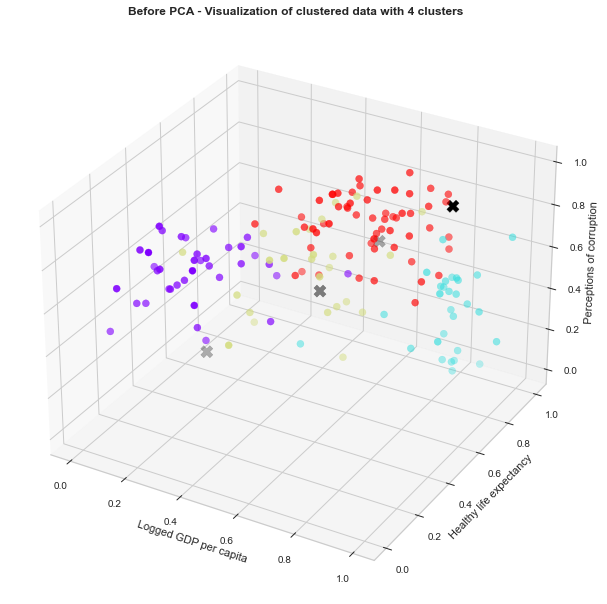

----------------------------------------------------------------------------------------------------


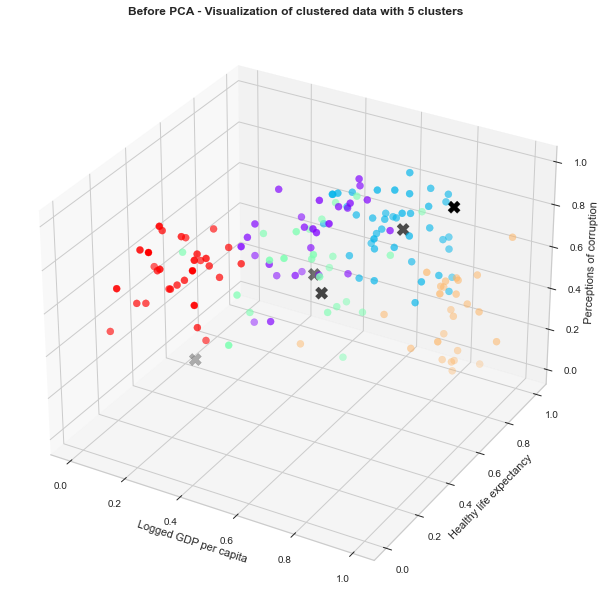

In [56]:
#Kmeans w/ data scaled
clusters = [4,5]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(df_val)
    
    # defining the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]


    # creating a new plot
    fig = plt.figure(figsize=(8,10))
    ax = Axes3D(fig)

    # taking the scaled data
    x = df_val[: ,0]
    y = df_val[: ,2]
    z = df_val[: ,5]

    # defining the axes labels
    column_names = df_int.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[2])
    ax.set_zlabel(column_names[5])

    # creating a new plot
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='rainbow', s = 50)
    ax.scatter(C1, C2, C3, marker="X",s=150, color='black')

    plt.title('Before PCA - Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()

----------------------------------------------------------------------------------------------------


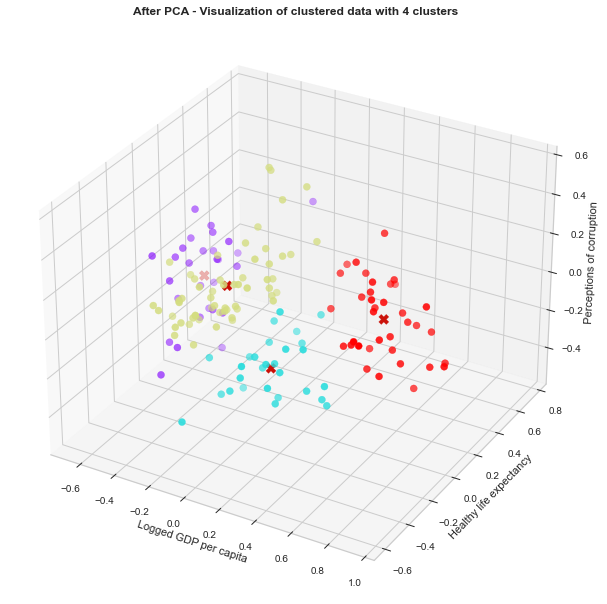

----------------------------------------------------------------------------------------------------


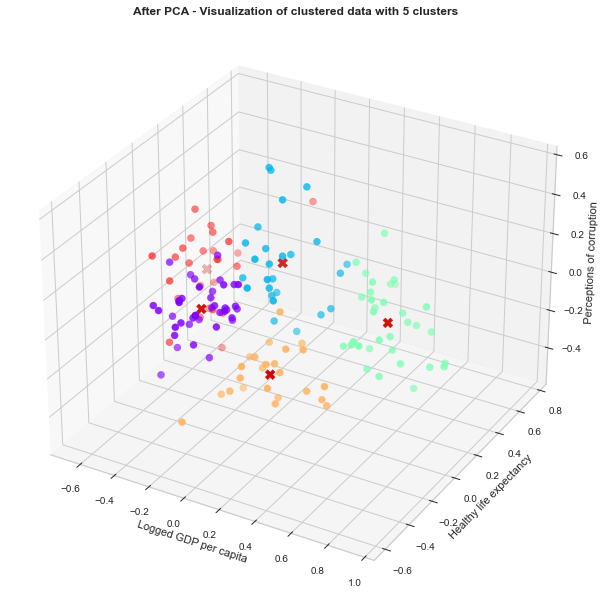

In [57]:
clusters = [4,5] 

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_df)
    
  
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]

    
    fig = plt.figure(figsize=(8,10))
    ax = Axes3D(fig)


    x = pca_df['PC1']
    y = pca_df['PC2']
    z = pca_df['PC3']
    


    column_names = df_int.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[2])
    ax.set_zlabel(column_names[5])

    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='rainbow', s=50)
    ax.scatter(C1, C2, C3, marker="X",s=100, color='r')

    plt.title('After PCA - Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()
    
    

In [58]:
#predicting the model
kmeans = results_dict[5]['model']

y_kmeans = kmeans.predict(pca_df)

In [59]:
kmeans.cluster_centers_.shape

(5, 3)

In [60]:
kmeans.cluster_centers_ 

array([[-0.23263423, -0.21273582,  0.04457142],
       [ 0.01996101,  0.08959027,  0.18498086],
       [ 0.57835192,  0.14225062, -0.00402674],
       [ 0.15822935, -0.21580598, -0.18634406],
       [-0.5421821 ,  0.25635225, -0.07643151]])

In [61]:
pca_df.shape

(149, 3)

In [62]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [pca_df])
cluster_centers

PC1       PC2       PC3
0 -0.232634 -0.212736  0.044571
1  0.019961  0.089590  0.184981
2  0.578352  0.142251 -0.004027
3  0.158229 -0.215806 -0.186344
4 -0.542182  0.256352 -0.076432

In [63]:
labels = kmeans.labels_

In [64]:
labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4,
       4, 0, 4, 0, 0, 0, 0, 1, 4, 4, 1, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 1, 1, 1, 0, 0, 4, 3, 0, 4, 1, 1, 3, 1, 1, 2, 0, 2, 3, 1, 0,
       0, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1,
       3, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2])

In [65]:
#CLUSTERING By Hierarchy: Hierarchical Agglomerative Clustering

In [66]:
pca_h = pca_df.copy()

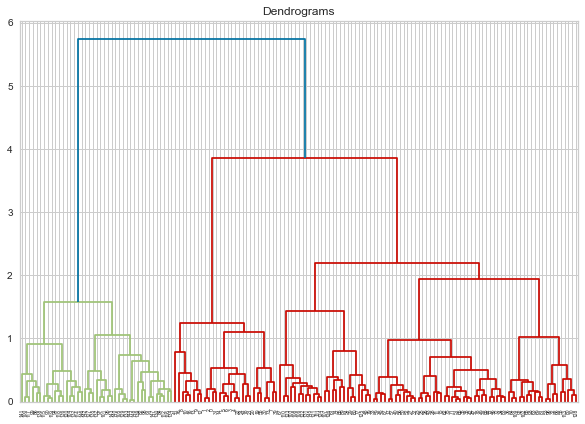

In [67]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
hir_df = shc.dendrogram(shc.linkage(pca_h, method='ward'))

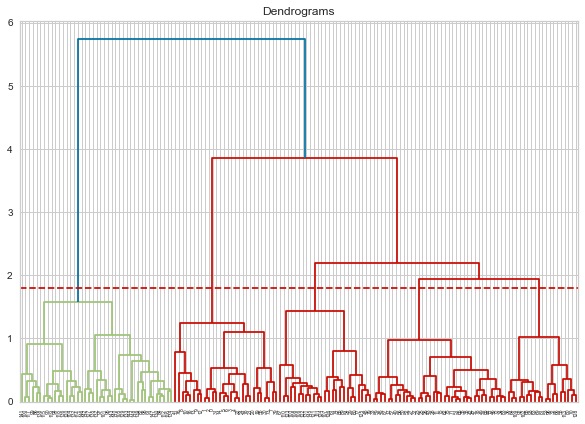

In [68]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
hir_df = shc.dendrogram(shc.linkage(pca_h, method='ward'))
plt.axhline(y=1.8, color='r', linestyle='--')

In [69]:
from sklearn.cluster import AgglomerativeClustering

hir_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hir_cluster.fit_predict(pca_h)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 4, 4, 1, 2, 2, 3, 4, 4, 4, 3, 4, 4, 2, 4, 2, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 1, 2, 4, 4, 3, 4, 1, 1, 4, 3, 3, 4,
       3, 1, 3, 3, 3, 4, 4, 2, 1, 4, 2, 1, 4, 1, 3, 3, 0, 4, 0, 1, 0, 4,
       4, 1, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 3,
       1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
pca_h

PC1       PC2       PC3
0   -0.576043  0.001498 -0.013779
1   -0.596733  0.138672  0.080644
2   -0.616022  0.103608  0.047030
3   -0.628591  0.285844  0.201096
4   -0.559769  0.319942  0.115927
..        ...       ...       ...
144  0.621672 -0.217182  0.107641
145  0.097149 -0.252698 -0.091630
146  0.513656  0.294714  0.118194
147  0.511260 -0.067497 -0.020726
148  0.648646 -0.215616  0.092922

[149 rows x 3 columns]

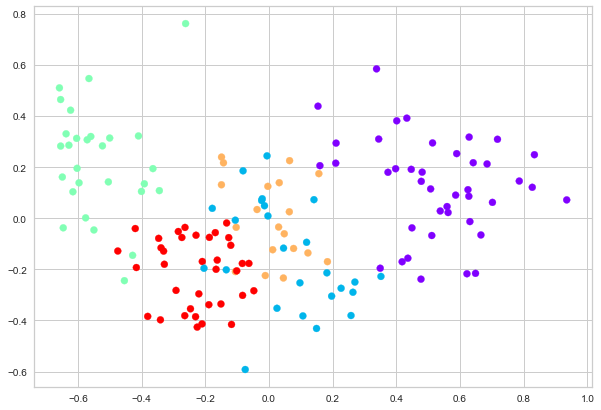

In [71]:
plt.figure(figsize=(10, 7))  
plt.scatter(pca_h['PC1'], pca_h['PC2'], c=hir_cluster.labels_, cmap='rainbow') 

In [72]:
#VISUALISATION - Interpreting results

In [78]:
final_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis =1)
pca_df = pd.concat([pca_df, Country[["Country name"]]], axis=1)
final_df

PC1       PC2       PC3 Country name  Cluster
0   -0.576043  0.001498 -0.013779      Finland        4
1   -0.596733  0.138672  0.080644      Denmark        4
2   -0.616022  0.103608  0.047030  Switzerland        4
3   -0.628591  0.285844  0.201096      Iceland        4
4   -0.559769  0.319942  0.115927  Netherlands        4
..        ...       ...       ...          ...      ...
144  0.621672 -0.217182  0.107641      Lesotho        2
145  0.097149 -0.252698 -0.091630     Botswana        3
146  0.513656  0.294714  0.118194       Rwanda        2
147  0.511260 -0.067497 -0.020726     Zimbabwe        2
148  0.648646 -0.215616  0.092922  Afghanistan        2

[149 rows x 5 columns]

In [79]:
Top_pca

PC                       feature   loading  type
0  PC1       Healthy life expectancy -0.538076  best
1  PC2                    Generosity  0.691195  best
2  PC3     Perceptions of corruption  0.775875  best
3  PC1         Logged GDP per capita -0.530443  weak
4  PC1                Social support -0.506895  weak
5  PC3  Freedom to make life choices  0.373181  weak

In [80]:
happy_f = final_df.rename(columns={'PC1':'Healthy life expectancy',  'PC2':'Generosity', 'PC3':'Perceptions of corruption'})

In [81]:
happy_f

Healthy life expectancy  Generosity  Perceptions of corruption  \
0                  -0.576043    0.001498                  -0.013779   
1                  -0.596733    0.138672                   0.080644   
2                  -0.616022    0.103608                   0.047030   
3                  -0.628591    0.285844                   0.201096   
4                  -0.559769    0.319942                   0.115927   
..                       ...         ...                        ...   
144                 0.621672   -0.217182                   0.107641   
145                 0.097149   -0.252698                  -0.091630   
146                 0.513656    0.294714                   0.118194   
147                 0.511260   -0.067497                  -0.020726   
148                 0.648646   -0.215616                   0.092922   

    Country name  Cluster  
0        Finland        4  
1        Denmark        4  
2    Switzerland        4  
3        Iceland        4  
4    Netherlands        4  
..           ...      ...  
144      Lesotho        2  
145     Botswana        3  
146       Rwanda        2  
147     Zimbabwe        2  
148  Afghanistan        2  

[149 rows x 5 columns]

In [82]:
fig = px.scatter(happy_f, x = 'Cluster', y = 'Healthy life expectancy', 
                 size = 'Cluster', color = 'Country name', hover_name = 'Country name',
                 trendline = 'ols')

fig.update_layout(
title_text = 'Happiness score Cluster'

)

fig.show()

In [83]:
data = dict(type = 'choropleth',
           locations = happy_f['Country name'],
           locationmode = 'country names',
           colorscale= 'RdYlGn',
           z = happy_f['Cluster'],
           text = happy_f['Country name'],
           colorbar = {'title': 'Cluster'})

layout = dict(title = 'Geographical Visualisation of Clusters',
            geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [84]:
Group_df = happy_f.groupby(['Cluster', 'Country name']).sum()
pd.set_option('display.max_rows', Group_df.shape[0]+1)
print(Group_df)

                                   Healthy life expectancy  Generosity  \
Cluster Country name                                                     
0       Argentina                                -0.220434   -0.295804   
        Belgium                                  -0.428472   -0.145068   
        Brazil                                   -0.126553   -0.075714   
        Bulgaria                                 -0.150979   -0.335448   
        Chile                                    -0.166325   -0.199710   
        China                                    -0.187361   -0.074829   
        Colombia                                 -0.101420   -0.205738   
        Costa Rica                               -0.331131   -0.128520   
        Croatia                                  -0.210451   -0.413416   
        Cyprus                                   -0.209624   -0.169118   
        Czech Republic                           -0.381072   -0.383964   
        Dominican Republic            

In [85]:
Group_df

Healthy life expectancy  Generosity  \
Cluster Country name                                                     
0       Argentina                                -0.220434   -0.295804   
        Belgium                                  -0.428472   -0.145068   
        Brazil                                   -0.126553   -0.075714   
        Bulgaria                                 -0.150979   -0.335448   
        Chile                                    -0.166325   -0.199710   
        China                                    -0.187361   -0.074829   
        Colombia                                 -0.101420   -0.205738   
        Costa Rica                               -0.331131   -0.128520   
        Croatia                                  -0.210451   -0.413416   
        Cyprus                                   -0.209624   -0.169118   
        Czech Republic                           -0.381072   -0.383964   
        Dominican Republic                       -0.168746   -0.056173   
        Ecuador                                  -0.063181   -0.176661   
        Hungary                                  -0.225581   -0.425873   
        Israel                                   -0.420159   -0.040221   
        Italy                                    -0.246696   -0.354222   
        Jamaica                                  -0.105663   -0.208692   
        Japan                                    -0.454271   -0.244106   
        Kazakhstan                               -0.284944   -0.051808   
        Kuwait                                   -0.273745   -0.075277   
        Latvia                                   -0.188997   -0.338216   
        Lithuania                                -0.264648   -0.381115   
        Maldives                                 -0.263914   -0.035858   
        Mauritius                                -0.229319   -0.066417   
        Mexico                                   -0.162677   -0.163709   
        Moldova                                  -0.011725   -0.224107   
        Montenegro                               -0.083893   -0.176874   
        Panama                                   -0.292103   -0.282280   
        Peru                                     -0.047704   -0.283571   
        Poland                                   -0.328754   -0.180007   
        Portugal                                 -0.341113   -0.397505   
        Romania                                  -0.117842   -0.415523   
        Russia                                   -0.083058   -0.301787   
        Saudi Arabia                             -0.346675   -0.078641   
        Serbia                                   -0.120136   -0.105894   
        Slovakia                                 -0.230738   -0.385212   
        Slovenia                                 -0.475016   -0.128166   
        South Korea                              -0.204269   -0.195763   
        Spain                                    -0.416716   -0.192774   
        Taiwan Province of China                 -0.339266   -0.115650   
1       Albania                                   0.122198   -0.135714   
        Bangladesh                                0.159864    0.205856   
        Bolivia                                   0.047904   -0.060665   
        Bosnia and Herzegovina                    0.011490   -0.123151   
        Cambodia                                  0.156537    0.174555   
        El Salvador                              -0.021335    0.076376   
        Guatemala                                -0.023227    0.069439   
        Honduras                                  0.032131    0.139152   
        Indonesia                                 0.063770    0.025325   
        Iran                                      0.209591    0.215479   
        Kosovo                                    0.064588    0.225442   
        Kyrgyzstan                               -0.003695    0.124755   
        Laos                           